# Import Libraries

In [1]:
pip install mlxtend


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix



In [3]:
import warnings
warnings.filterwarnings("ignore")

# Plotting function

In [31]:
# Function to visualize training and validation metrics with best epoch indicators

def plot_learning_curves(history_data, initial_epoch=0):
    # Extract accuracy and loss metrics from training history
    train_acc = history_data.history['accuracy']
    train_loss = history_data.history['loss']
    val_acc = history_data.history['val_accuracy']
    val_loss = history_data.history['val_loss']
    
    # Calculate the epoch range for plotting
    total_epochs = len(train_acc) + initial_epoch
    epoch_range = list(range(initial_epoch + 1, total_epochs + 1))
    
    # Identify the epochs with best validation accuracy and lowest validation loss
    best_loss_epoch = np.argmin(val_loss)
    min_val_loss = val_loss[best_loss_epoch]
    best_acc_epoch = np.argmax(val_acc)
    max_val_acc = val_acc[best_acc_epoch]
    
    # Set the plotting style and labels
    plt.style.use('fivethirtyeight')
    
    # Labels indicating the best epochs
    loss_label = f'Lowest validation loss at epoch {best_loss_epoch + 1 + initial_epoch}'
    acc_label = f'Highest validation accuracy at epoch {best_acc_epoch + 1 + initial_epoch}'
    
    # Create subplots for loss and accuracy
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Plot for Loss
    axes[0].plot(epoch_range, train_loss, 'r-', label='Training Loss')
    axes[0].plot(epoch_range, val_loss, 'g-', label='Validation Loss')
    axes[0].scatter(best_loss_epoch + 1 + initial_epoch, min_val_loss, s=120, c='blue', label=loss_label)
    axes[0].set_title('Loss Over Epochs')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    
    # Plot for Accuracy
    axes[1].plot(epoch_range, train_acc, 'r-', label='Training Accuracy')
    axes[1].plot(epoch_range, val_acc, 'g-', label='Validation Accuracy')
    axes[1].scatter(best_acc_epoch + 1 + initial_epoch, max_val_acc, s=120, c='blue', label=acc_label)
    axes[1].set_title('Accuracy Over Epochs')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()


# Data

In [32]:
# Load dataset
train_data = pd.read_csv('mitbih_train.csv')
test_data = pd.read_csv('mitbih_test.csv')

In [6]:
print(f"Number of samples in train data: {train_data.shape[0]}")
print(f"Number of samples in test data: {test_data.shape[0]}")

Number of samples in train data: 87553
Number of samples in test data: 21891


In [7]:
# Explore the dataset
train_data.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(f"Missing values in train data: {train_data.isna().sum().sum()}")
print(f"Missing values in test data: {test_data.isna().sum().sum()}")
print(f"Duplicated values in train data: {train_data.duplicated().sum()}")
print(f"Duplicated values in test data: {test_data.duplicated().sum()}")

Missing values in train data: 0
Missing values in test data: 0
Duplicated values in train data: 0
Duplicated values in test data: 0


In [9]:
# Display the distribution of classes in the training dataset
train_class_counts = train_data.iloc[:, -1].value_counts()# Verify class balance in training data
print(train_class_counts)


0.000000000000000000e+00.88
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [10]:
# Display the distribution of classes in the training dataset
test_class_counts = test_data.iloc[:, -1].value_counts()# Verify class balance in training data
print(test_class_counts)


0.000000000000000000e+00.65
0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


In [4]:
test_classes = test_data.iloc[:, -1].unique()
train_classes = train_data.iloc[:, -1].unique()

In [33]:
labels = {
    0: "Non-ecotic beats (normal beat)",
    1: "Supraventricular ectopic beats",
    2: "Ventricular ectopic beats ",
    3: "Fusion Beats",
    4: "Unknown Beats"
}

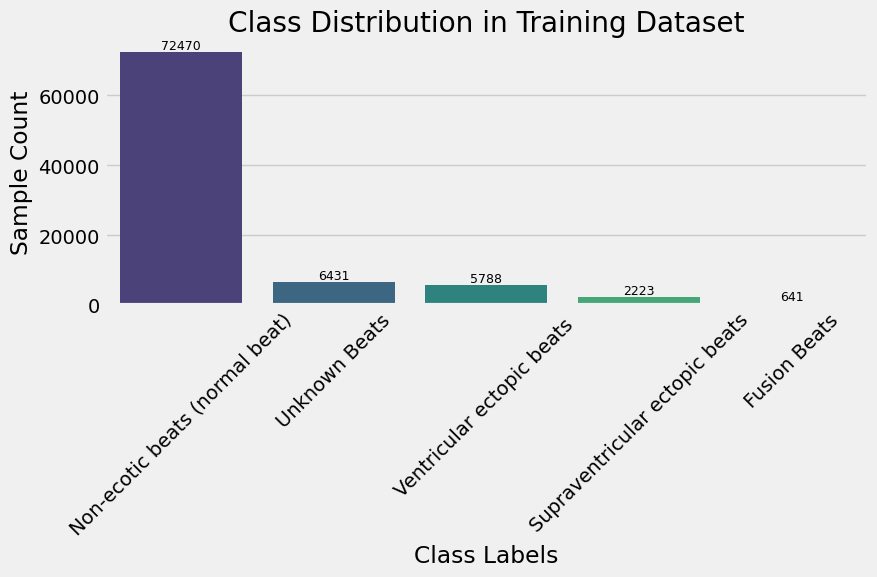

In [95]:
# Calculate and plot the number of samples per class in training data
train_class_counts = train_data.iloc[:, -1].value_counts().rename(labels)

plt.figure(figsize=(9, 6))
bar_plot = sns.barplot(x=train_class_counts.index, y=train_class_counts.values, palette="viridis")

# Add annotations on top of each bar
for index, bar in enumerate(bar_plot.patches):
    bar_plot.annotate(f'{train_class_counts[index]}', 
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=9, color='black')

plt.title('Class Distribution in Training Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Sample Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


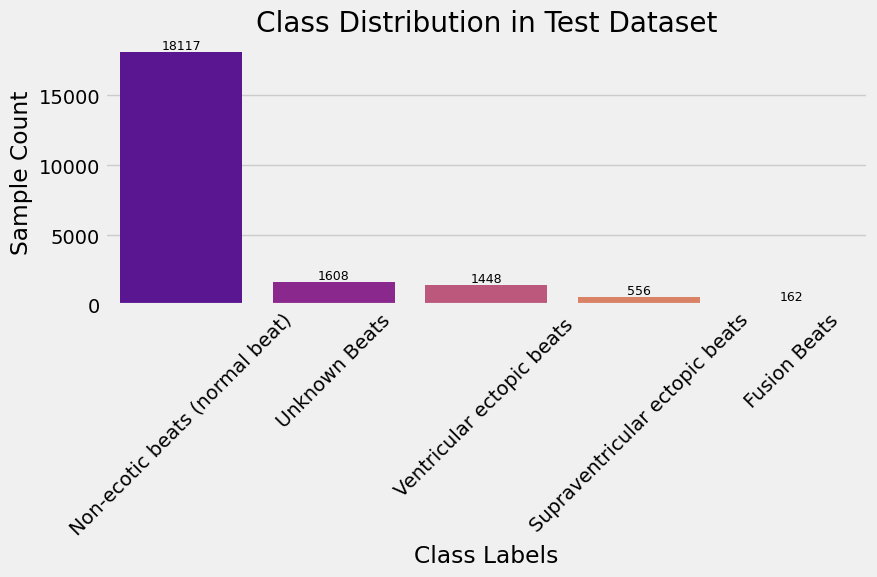

In [96]:
# Calculate and visualize the sample count per class in test dataset
test_class_distribution = test_data.iloc[:, -1].value_counts().rename(labels)

plt.figure(figsize=(9, 6))
bar_chart = sns.barplot(x=test_class_distribution.index, y=test_class_distribution.values, palette="plasma")

# Add annotations above each bar
for idx, bar in enumerate(bar_chart.patches):
    bar_chart.annotate(f'{test_class_distribution[idx]}', 
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                       ha='center', va='bottom', 
                       fontsize=9, color='black')

plt.title('Class Distribution in Test Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Sample Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


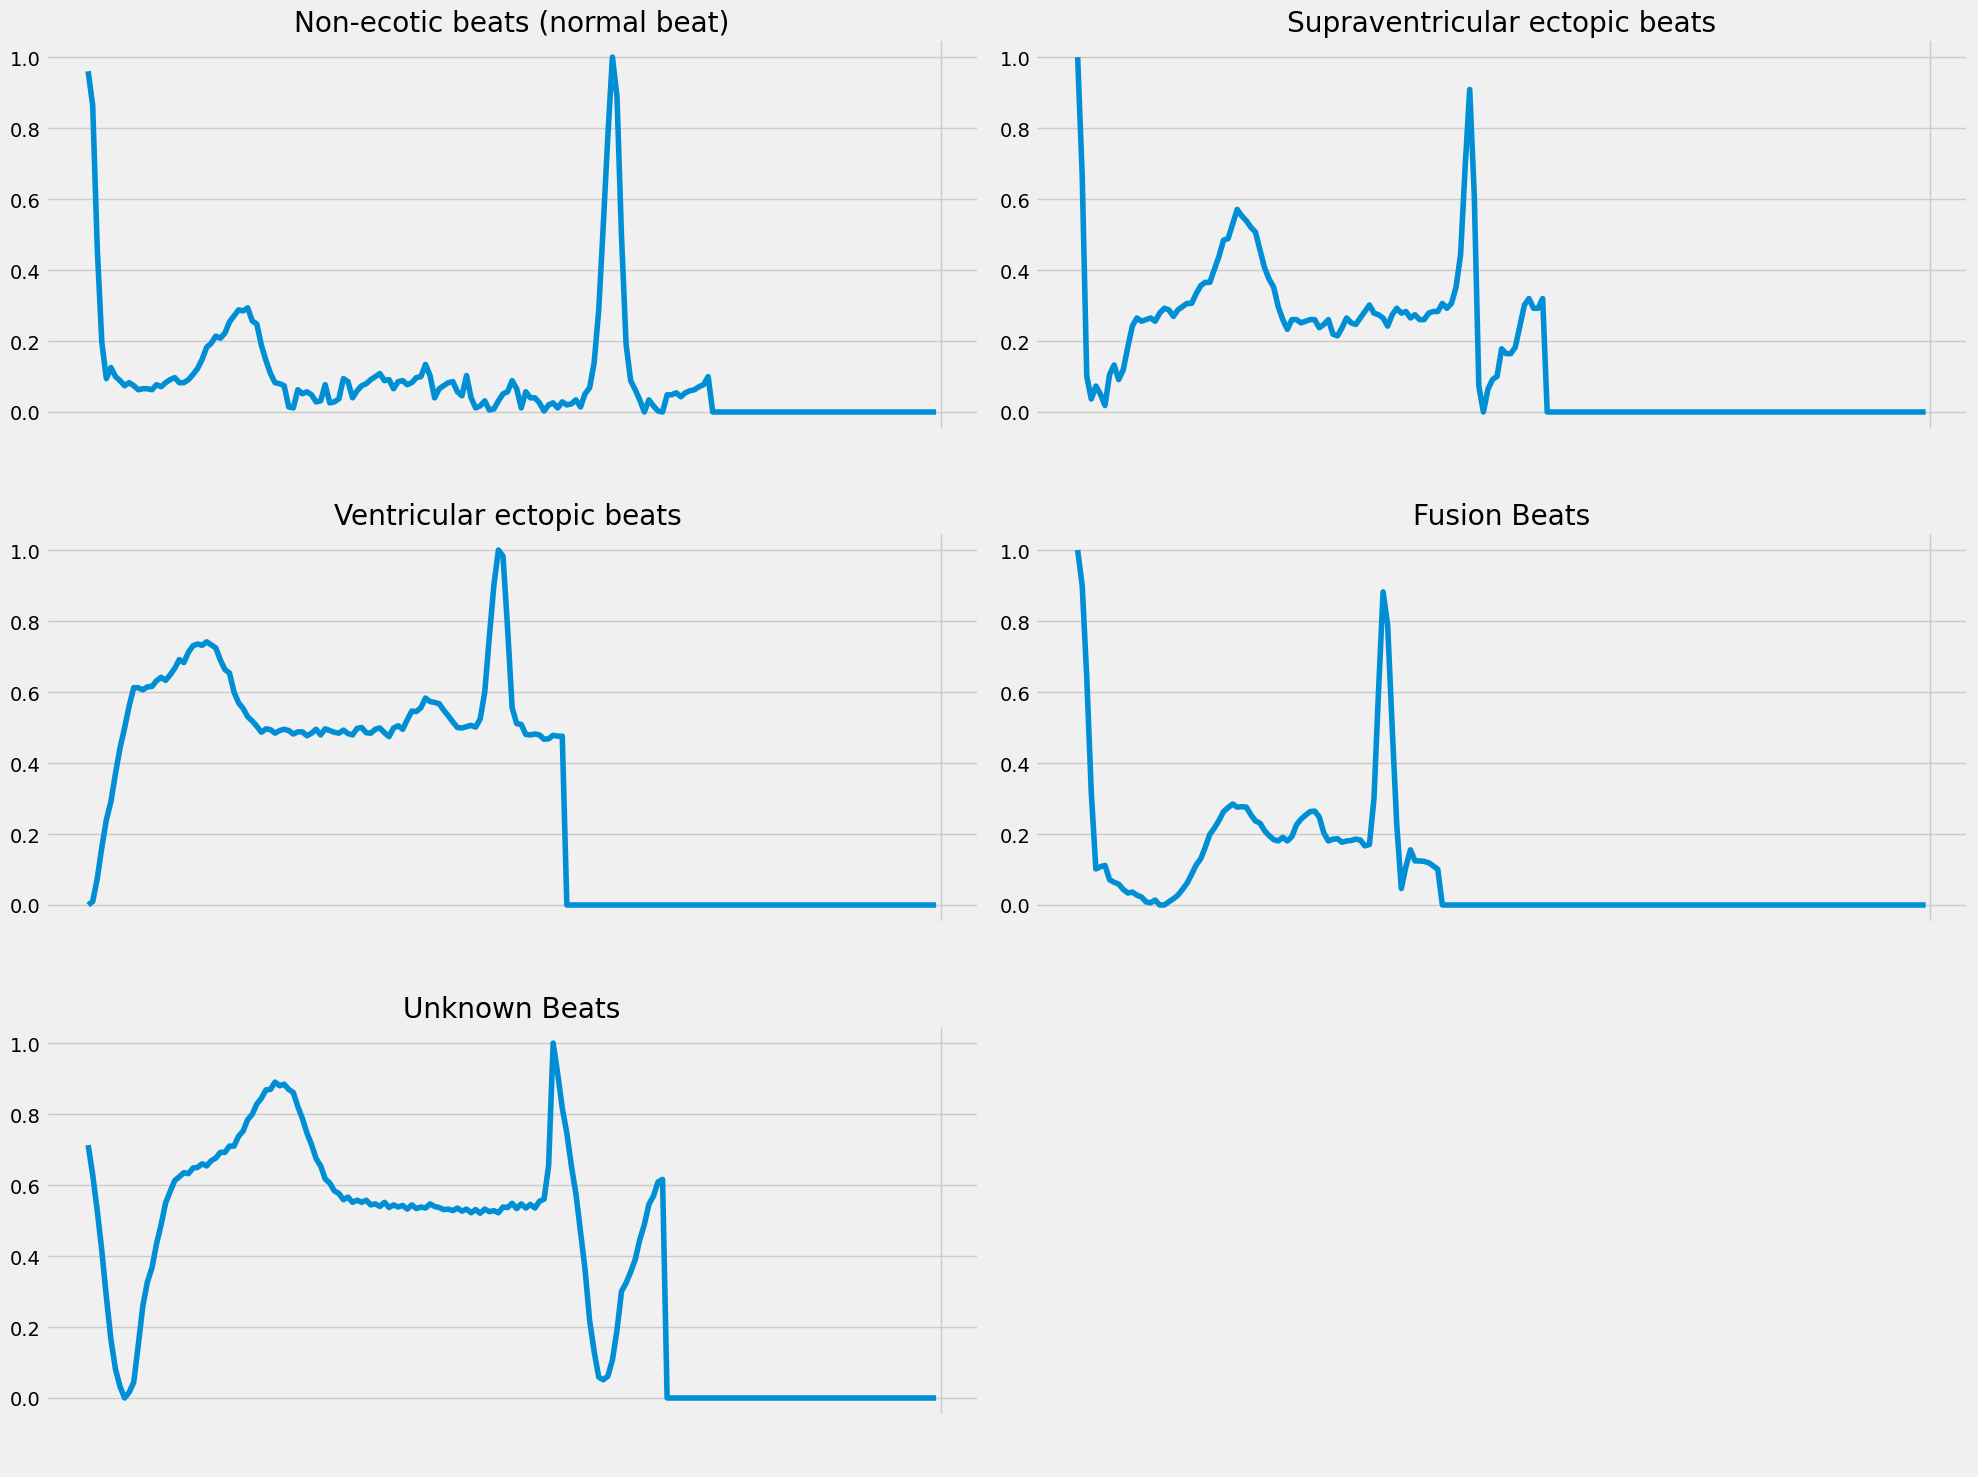

In [97]:
# Plot each class
train_classes = train_data.iloc[:, -1].unique()

plt.figure(figsize=(20, 15))

for i, cls in enumerate(train_classes):
    plt.subplot(3, 2, i + 1)
    plt.plot(train_data[train_data.iloc[:, -1] == cls].iloc[0, :-1])  # Exclude the label column
    plt.title(f'{list(labels.values())[i]}')
    plt.xlabel(" ")
    plt.xticks(ticks=" ",labels =" ",rotation=45)

plt.tight_layout()
plt.show()

# Data Preprocessing

In [34]:
# Separate features and labels for training and test datasets
features_train = train_data.iloc[:, :-1].values  # All columns except the last one
labels_train = train_data.iloc[:, -1].values     # Only the label column

features_test = test_data.iloc[:, :-1].values
labels_test = test_data.iloc[:, -1].values

# Normalize the feature data
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Determine the number of samples for validation set
num_test_samples = features_test_scaled.shape[0]

# Split the test set into validation and new test set with equal sizes
X_val, X_test_final, y_val, y_test_final = train_test_split(
    features_test_scaled, labels_test, test_size=0.5, random_state=42, stratify=labels_test
)

# Reshape data for RNN/LSTM/GRU compatibility (samples, timesteps, features)
features_train_scaled = np.reshape(features_train_scaled, (features_train_scaled.shape[0], features_train_scaled.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_final = np.reshape(X_test_final, (X_test_final.shape[0], X_test_final.shape[1], 1))

# Print the sizes of the newly created datasets
print(f"Size of new training set: {features_train_scaled.shape[0]}")
print(f"Size of validation set: {X_val.shape[0]}")
print(f"Size of final test set: {X_test_final.shape[0]}")


Size of new training set: 87553
Size of validation set: 10945
Size of final test set: 10946


In [17]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=6,
                               restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              verbose=1,
                              patience=2,
                              min_lr=1e-6)

model_checkpoint = ModelCheckpoint('model.keras',
                                   monitor='val_loss',
                                   save_best_only=True)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

# GRU model

In [18]:
def create_gru_model():
    model = Sequential()
    # First GRU layer with batch normalization and dropout
    model.add(GRU(128, input_shape=(features_train_scaled.shape[1], 1), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Second GRU layer with reduced units
    model.add(GRU(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Third GRU layer without returning sequences (last in sequence)
    model.add(GRU(32))
    model.add(Dropout(0.3))
    
    # Fully connected dense layers for classification
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    
    return model

# Initialize and compile the GRU model
gru_model = create_gru_model()
gru_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with validation data and callback support
gru_history = gru_model.fit(
    features_train_scaled, labels_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr, model_checkpoint, early_stopping]
)


Epoch 1/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 627s 228ms/step - accuracy: 0.8434 - loss: 0.5873 - val_accuracy: 0.8679 - val_loss: 0.4259 - learning_rate: 0.0010
Epoch 2/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 610s 223ms/step - accuracy: 0.9463 - loss: 0.2109 - val_accuracy: 0.9339 - val_loss: 0.2784 - learning_rate: 0.0010
Epoch 3/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 610s 223ms/step - accuracy: 0.9591 - loss: 0.1615 - val_accuracy: 0.9399 - val_loss: 0.2092 - learning_rate: 0.0010
Epoch 4/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 622s 227ms/step - accuracy: 0.9641 - loss: 0.1435 - val_accuracy: 0.8984 - val_loss: 0.3460 - learning_rate: 0.0010
Epoch 5/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 605s 221ms/step - accuracy: 0.9623 - loss: 0.1434 - val_accuracy: 0.9615 - val_loss: 0.1572 - learning_rate: 0.0010
Epoch 6/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 613s 224ms/step - accuracy: 0.9702 - loss: 0.1180 - val_accuracy: 0.9527 - val_loss: 0.1739 - learning_rate: 0.0010
Epoch 7/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/s

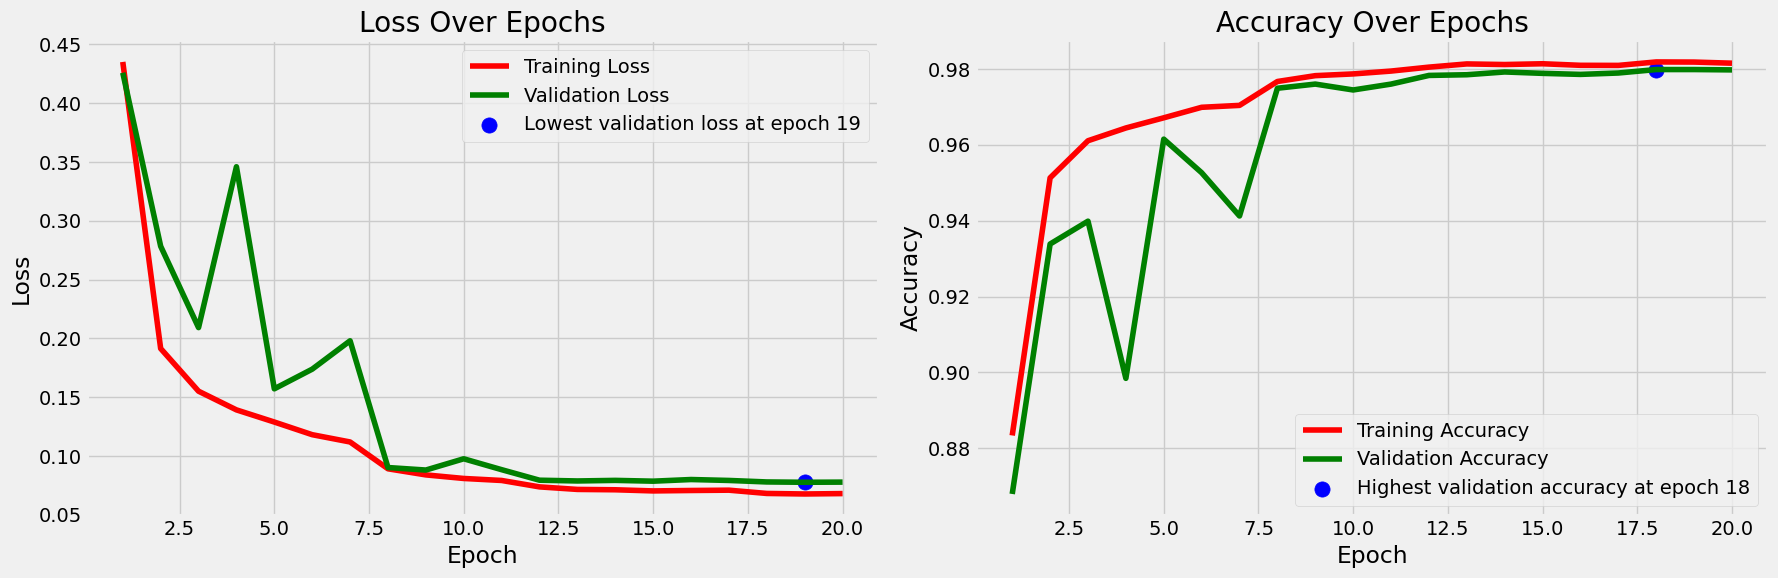

In [19]:
plot_learning_curves(gru_history, initial_epoch=0)

In [20]:
y_test_pred_gru = gru_model.predict(X_test_final).argmax(axis=1)

343/343 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step


In [21]:
# Evaluate GRU Model on Test Data
gru_test_loss, gru_test_acc = gru_model.evaluate(X_test_final, y_test_final, verbose=0)
print(f"GRU Test Loss: {gru_test_loss:.4f}")
print(f"GRU Test Accuracy: {gru_test_acc:.4f}")

GRU Test Loss: 0.0836
GRU Test Accuracy: 0.9789


In [22]:
# GRU classification report
print("GRU Classification Report:")
print(classification_report(y_test_final, y_test_pred_gru))

GRU Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9059
         1.0       0.81      0.67      0.73       278
         2.0       0.94      0.95      0.95       724
         3.0       0.83      0.77      0.79        81
         4.0       0.99      0.99      0.99       804

    accuracy                           0.98     10946
   macro avg       0.91      0.87      0.89     10946
weighted avg       0.98      0.98      0.98     10946



In [102]:
class_names = [labels[i] for i in range(len(labels))]

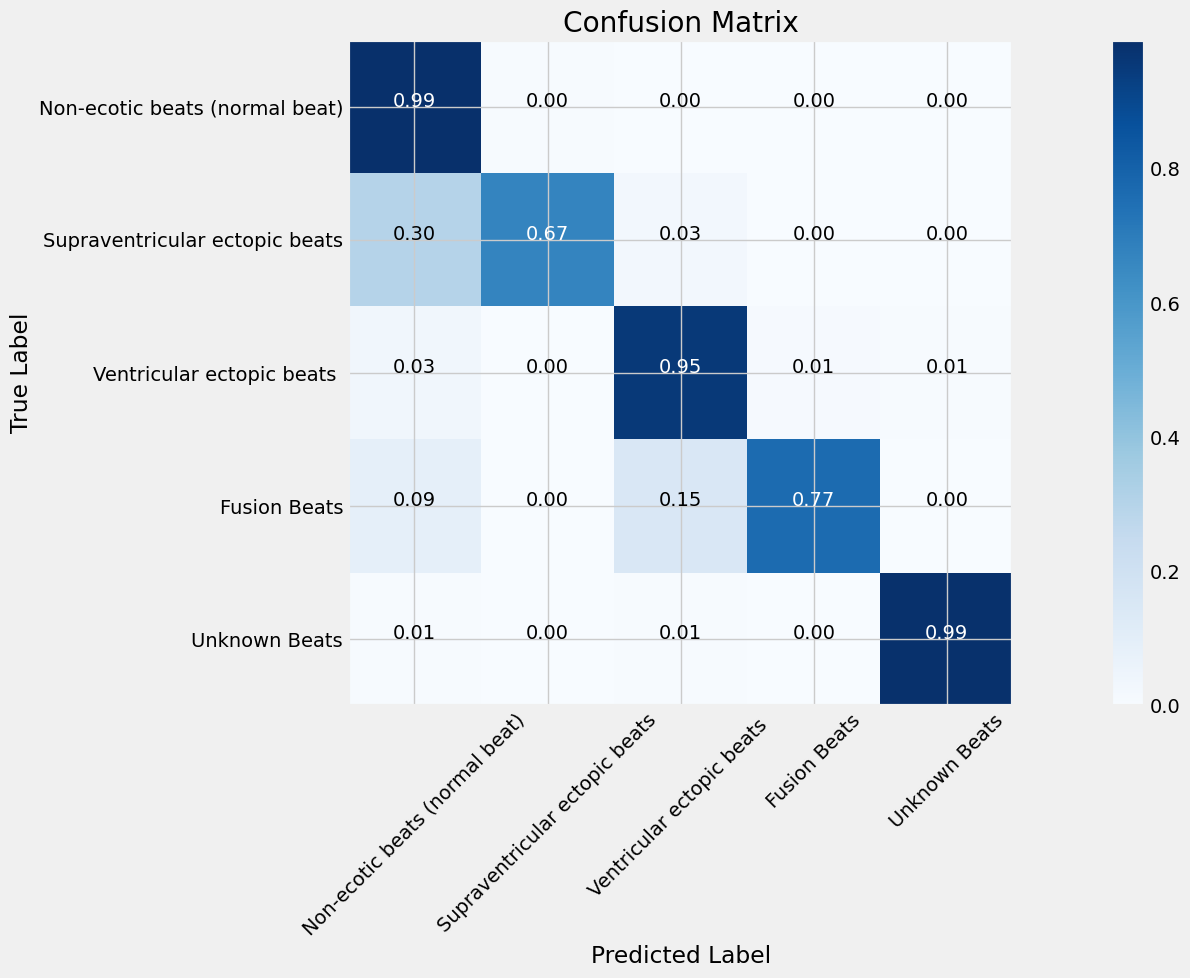

In [118]:
# Confusion matrix for GRU
conf_matrix_gru = confusion_matrix(y_test_final, y_test_pred_gru)

plot_confusion_matrix(conf_matrix_gru, 
                      class_names=class_names, 
                      show_normed=True,
                      figsize=(20,10),
                      colorbar=True)

# LSTM model

In [46]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=6,
                               restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              verbose=1,
                              patience=2,
                              min_lr=1e-6)

model_checkpoint = ModelCheckpoint('model.keras',
                                   monitor='val_loss',
                                   save_best_only=True)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [47]:
def create_lstm_model():
    model = Sequential()
    # First LSTM layer with batch normalization and dropout
    model.add(LSTM(128, input_shape=(features_train_scaled.shape[1], 1), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Second LSTM layer with return_sequences for stacked architecture
    model.add(LSTM(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Third LSTM layer without returning sequences (last in sequence)
    model.add(LSTM(32))
    model.add(Dropout(0.3))
    
    # Dense layer before the output for increased complexity
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    
    # Output layer with softmax activation for multiclass classification
    model.add(Dense(5, activation='softmax'))
    
    return model

# Initialize and compile the LSTM model
lstm_model = create_lstm_model()
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with validation data and callback support
lstm_history = lstm_model.fit(
    features_train_scaled, labels_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr, model_checkpoint, early_stopping]
)


Epoch 1/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 384s 139ms/step - accuracy: 0.8246 - loss: 0.6709 - val_accuracy: 0.9062 - val_loss: 0.4133 - learning_rate: 0.0010
Epoch 2/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 366s 134ms/step - accuracy: 0.9158 - loss: 0.3260 - val_accuracy: 0.8317 - val_loss: 0.7077 - learning_rate: 0.0010
Epoch 3/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 359s 131ms/step - accuracy: 0.9357 - loss: 0.2423 - val_accuracy: 0.9467 - val_loss: 0.2095 - learning_rate: 0.0010
Epoch 4/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 358s 131ms/step - accuracy: 0.9424 - loss: 0.2187 - val_accuracy: 0.9337 - val_loss: 0.2394 - learning_rate: 0.0010
Epoch 5/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 356s 130ms/step - accuracy: 0.9490 - loss: 0.1918 - val_accuracy: 0.9483 - val_loss: 0.1952 - learning_rate: 0.0010
Epoch 6/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 356s 130ms/step - accuracy: 0.9559 - loss: 0.1675 - val_accuracy: 0.9487 - val_loss: 0.1750 - learning_rate: 0.0010
Epoch 7/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 359s 131ms

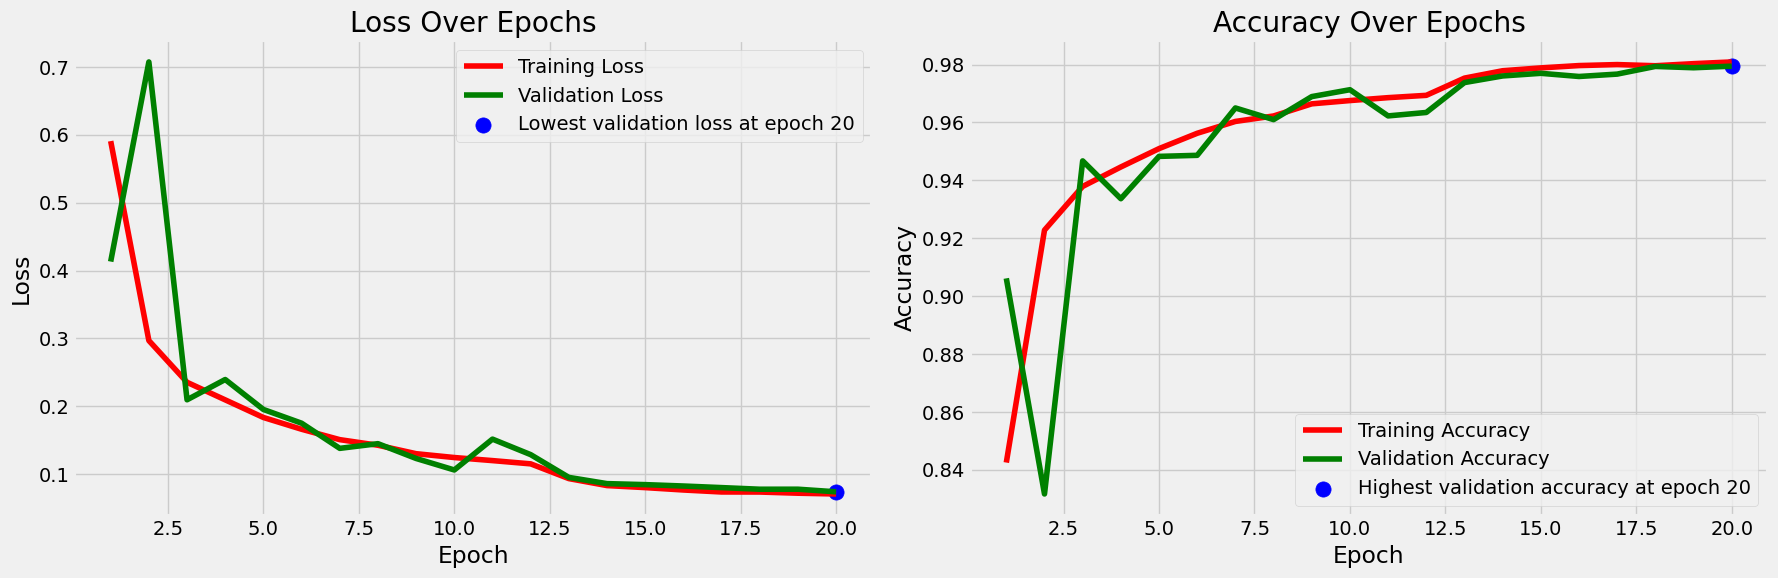

In [48]:
plot_learning_curves(lstm_history, initial_epoch=0)

In [49]:
y_test_pred_lstm = lstm_model.predict(X_test_final).argmax(axis=1)

343/343 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step


In [50]:
# Evaluate LSTM Model on Test Data
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test_final, y_test_final, verbose=0)
print(f"LSTM Test Loss: {lstm_test_loss:.4f}")
print(f"LSTM Test Accuracy: {lstm_test_acc:.4f}")

LSTM Test Loss: 0.0748
LSTM Test Accuracy: 0.9814


In [51]:
# LSTM classification report
print("LSTM Classification Report:")
print(classification_report(y_test_final, y_test_pred_lstm))

LSTM Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9059
         1.0       0.90      0.65      0.76       278
         2.0       0.95      0.96      0.95       724
         3.0       0.88      0.74      0.81        81
         4.0       0.99      0.98      0.98       804

    accuracy                           0.98     10946
   macro avg       0.94      0.87      0.90     10946
weighted avg       0.98      0.98      0.98     10946



In [113]:
class_names = [labels[i] for i in range(len(labels))]

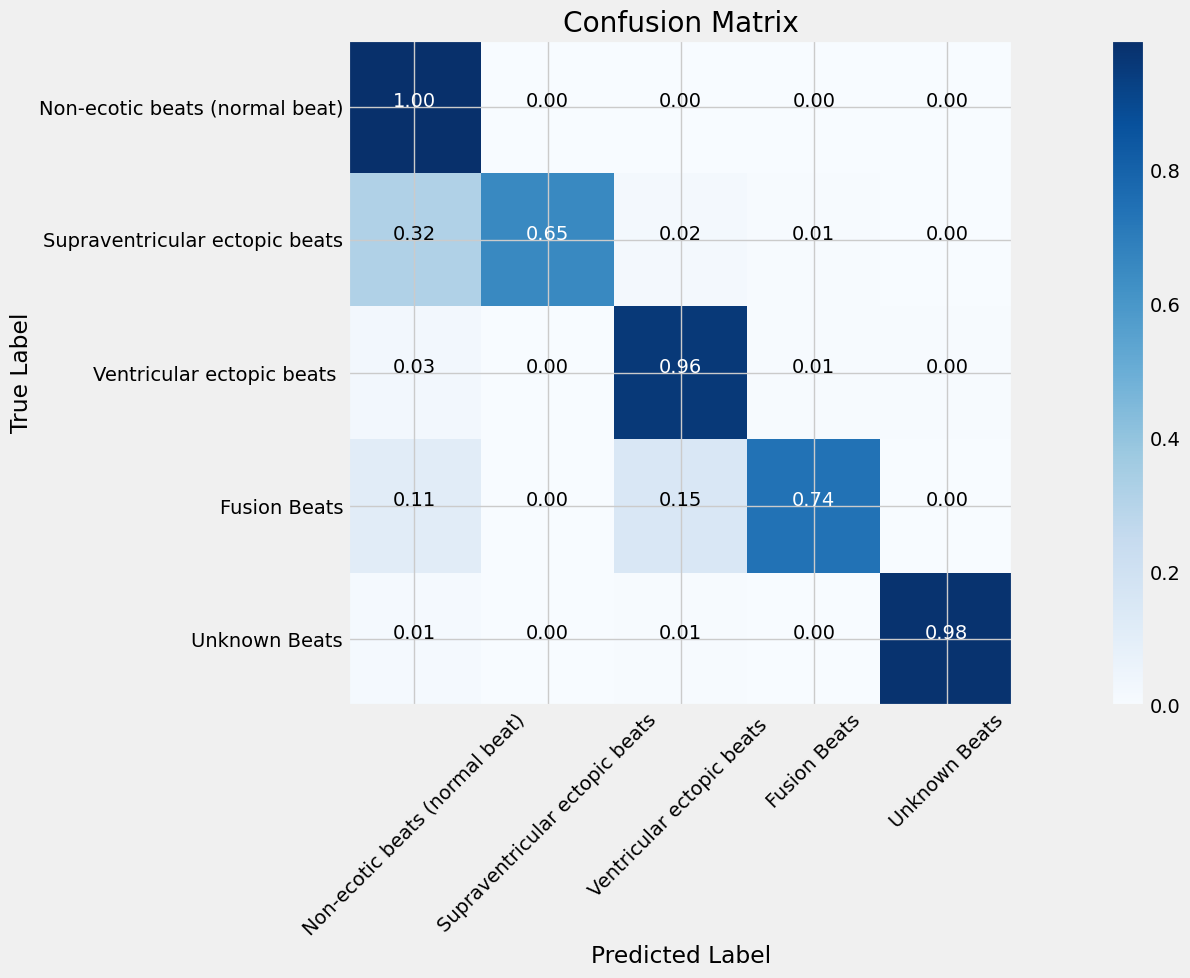

In [126]:
# Confusion matrix for LSTM
conf_matrix_lstm = confusion_matrix(y_test_final, y_test_pred_lstm)

plot_confusion_matrix(conf_matrix_lstm, 
                      class_names=class_names, 
                      show_normed=True,
                      figsize=(20,10),
                      colorbar=True)


In [54]:
# Save the GRU model
gru_model.save("gru_model.h5")

# Save the LSTM model
lstm_model.save("lstm_model.h5")


## Attempting aditional improvements for hybrid model architecture with data augmentation using Random over sampler

In [39]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, LSTM, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [41]:
# Define augmentation functions
def add_noise(data, noise_factor=0.05):
    noise = np.random.normal(0, 1, data.shape) * noise_factor
    return data + noise

def time_shift(data, max_shift=5):
    shift = np.random.randint(-max_shift, max_shift)
    return np.roll(data, shift, axis=0)

def scale_signal(data, scale_factor=1.2):
    scale = np.random.uniform(1, scale_factor)
    return data * scale

def jitter_signal(data, jitter_factor=0.05):
    jitter = np.random.uniform(-jitter_factor, jitter_factor, data.shape)
    return data + jitter

def time_warp(data, max_time_warp=5):
    warp = np.random.uniform(-max_time_warp, max_time_warp, data.shape)
    return data + warp

# Load and balance the data
data, labels = train_data.iloc[:, :-1].values, train_data.iloc[:, -1].values
ros = RandomOverSampler(random_state=42)
data_balanced, labels_balanced = ros.fit_resample(data, labels)

# Apply augmentations to each sample in the balanced dataset
data_augmented = np.concatenate([
    add_noise(data_balanced),
    time_shift(data_balanced),
    scale_signal(data_balanced),
    jitter_signal(data_balanced),
    time_warp(data_balanced)
])

labels_augmented = np.tile(labels_balanced, 5)  # Repeat labels for each augmentation

# Combine original balanced data with augmented data
data_combined = np.concatenate((data_balanced, data_augmented), axis=0)
labels_combined = np.concatenate((labels_balanced, labels_augmented), axis=0)

# Standardize the data
scaler = MinMaxScaler()
data_combined = scaler.fit_transform(data_combined)


In [42]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    data_combined, labels_combined, test_size=0.2, stratify=labels_combined, random_state=42
)
X_test, y_test = test_data.iloc[:, :-1].values, test_data.iloc[:, -1].values
X_test = scaler.transform(X_test)


In [35]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Prepare and augment the data with noise
def add_noise(data, noise_factor=0.05):
    noise = np.random.normal(0, 1, data.shape) * noise_factor
    return data + noise

# Apply Random Oversampling to balance the data
data, labels = train_data.iloc[:, :-1].values, train_data.iloc[:, -1].values
ros = RandomOverSampler(random_state=42)
data_balanced, labels_balanced = ros.fit_resample(data, labels)

# Apply noise to create an augmented version of the balanced data
data_augmented = add_noise(data_balanced)
data_combined = np.concatenate((data_balanced, data_augmented), axis=0)
labels_combined = np.concatenate((labels_balanced, labels_balanced), axis=0)

# Standardize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_combined = scaler.fit_transform(data_combined)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    data_combined, labels_combined, test_size=0.2, stratify=labels_combined, random_state=42
)
X_test, y_test = test_data.iloc[:, :-1].values, test_data.iloc[:, -1].values
X_test = scaler.transform(X_test)


In [45]:
# Define the hybrid model architecture
def create_hybrid_model():
    model = Sequential()
    model.add(Conv1D(64, kernel_size=6, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=3))
    model.add(Dropout(0.3))
    
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    model.add(GRU(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(LSTM(32))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    
    return model

# Initialize and compile the hybrid model
hybrid_model = create_hybrid_model()
hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks for training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6),
    ModelCheckpoint(filepath='best_hybrid_model.keras', monitor='val_loss', save_best_only=True)
]

# Train the model with augmented data
history = hybrid_model.fit(
    X_train, y_train, 
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
54353/54353 ━━━━━━━━━━━━━━━━━━━━ 1346s 25ms/step - accuracy: 0.7322 - loss: 0.6634 - val_accuracy: 0.5826 - val_loss: 1.1302 - learning_rate: 0.0010
Epoch 2/10
54353/54353 ━━━━━━━━━━━━━━━━━━━━ 1321s 24ms/step - accuracy: 0.8229 - loss: 0.4139 - val_accuracy: 0.6408 - val_loss: 0.9860 - learning_rate: 0.0010
Epoch 3/10
54353/54353 ━━━━━━━━━━━━━━━━━━━━ 1285s 24ms/step - accuracy: 0.8314 - loss: 0.3875 - val_accuracy: 0.6099 - val_loss: 1.3353 - learning_rate: 0.0010
Epoch 4/10
54353/54353 ━━━━━━━━━━━━━━━━━━━━ 1332s 25ms/step - accuracy: 0.8349 - loss: 0.3763 - val_accuracy: 0.7935 - val_loss: 0.5012 - learning_rate: 0.0010
Epoch 5/10
54353/54353 ━━━━━━━━━━━━━━━━━━━━ 1352s 25ms/step - accuracy: 0.8381 - loss: 0.3683 - val_accuracy: 0.8173 - val_loss: 0.4343 - learning_rate: 0.0010
Epoch 6/10
54353/54353 ━━━━━━━━━━━━━━━━━━━━ 1363s 25ms/step - accuracy: 0.8388 - loss: 0.3642 - val_accuracy: 0.8312 - val_loss: 0.3855 - learning_rate: 0.0010
Epoch 7/10
54353/54353 ━━━━━━━━━━━━━━━━━

In [46]:
# Evaluate the model on the test set
test_loss, test_accuracy = hybrid_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9460 - loss: 0.1605
Test accuracy: 0.9444


In [47]:
# Generate predictions for evaluation
y_pred_probs = hybrid_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [48]:
# Print classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     18117
         1.0       0.41      0.84      0.55       556
         2.0       0.92      0.93      0.93      1448
         3.0       0.38      0.89      0.53       162
         4.0       0.97      0.98      0.98      1608

    accuracy                           0.94     21891
   macro avg       0.73      0.92      0.79     21891
weighted avg       0.97      0.94      0.95     21891



# Final Hybrid architecture with data augmentation

In [32]:
# Load and preprocess data
features_train = train_data.iloc[:, :-1].values
labels_train = train_data.iloc[:, -1].values
features_test = test_data.iloc[:, :-1].values
labels_test = test_data.iloc[:, -1].values
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)


In [33]:
# Split test set into validation and final test sets
X_val, X_test_final, y_val, y_test_final = train_test_split(
    features_test_scaled, labels_test, test_size=0.5, random_state=42, stratify=labels_test
)


In [34]:
# Reshape data for RNN/LSTM/GRU compatibility
features_train_scaled = np.reshape(features_train_scaled, (features_train_scaled.shape[0], features_train_scaled.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_final = np.reshape(X_test_final, (X_test_final.shape[0], X_test_final.shape[1], 1))


In [35]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=2, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('hybrid_model.keras', monitor='val_loss', save_best_only=True)
callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Augmentation Functions
def time_shift(signal, max_shift=5):
    """Shift the signal by a random amount between -max_shift and +max_shift."""
    shift = np.random.randint(-max_shift, max_shift)
    return np.roll(signal, shift, axis=0)

def add_noise(signal, noise_factor=0.01):
    """Add random noise to the signal."""
    noise = np.random.normal(0, noise_factor, signal.shape)
    return signal + noise

def scale_signal(signal, scale_factor=1.2):
    """Scale the signal by a random factor."""
    scale = np.random.uniform(1, scale_factor)
    return signal * scale

def jitter_signal(signal, jitter_factor=0.05):
    """Jitter the signal by adding random offsets."""
    jitter = np.random.uniform(-jitter_factor, jitter_factor, signal.shape)
    return signal + jitter

# Create augmented datasets with each function
features_train_time_shifted = time_shift(features_train_scaled)
features_train_noisy = add_noise(features_train_scaled)
features_train_scaled_augmented = scale_signal(features_train_scaled)
features_train_jittered = jitter_signal(features_train_scaled)

# Combine the original and augmented datasets
features_train_combined = np.concatenate(
    (features_train_scaled, features_train_time_shifted, features_train_noisy, 
     features_train_scaled_augmented, features_train_jittered),
    axis=0
)
labels_train_combined = np.concatenate(
    (labels_train, labels_train, labels_train, labels_train, labels_train),
    axis=0
)


In [36]:
# Hybrid Model Definition
def create_hybrid_model():
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(features_train_scaled.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    # GRU layer (before Flatten)
    model.add(GRU(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # LSTM layer (before Flatten)
    model.add(LSTM(32))
    model.add(Dropout(0.3))
    
    # Flatten the output
    model.add(Flatten())
    
    # Dense layers with L2 regularization for the first Dense layer
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(5, activation='softmax'))
    
    return model

# Initialize and compile the hybrid model
hybrid_model = create_hybrid_model()
hybrid_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the hybrid model with augmented data
hybrid_history = hybrid_model.fit(
    features_train_combined, labels_train_combined,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
13681/13681 ━━━━━━━━━━━━━━━━━━━━ 490s 34ms/step - accuracy: 0.9066 - loss: 0.3898 - val_accuracy: 0.9667 - val_loss: 0.1478 - learning_rate: 0.0010
Epoch 2/20
13681/13681 ━━━━━━━━━━━━━━━━━━━━ 436s 32ms/step - accuracy: 0.9671 - loss: 0.1348 - val_accuracy: 0.9734 - val_loss: 0.1172 - learning_rate: 0.0010
Epoch 3/20
13681/13681 ━━━━━━━━━━━━━━━━━━━━ 299s 22ms/step - accuracy: 0.9742 - loss: 0.1060 - val_accuracy: 0.9734 - val_loss: 0.1035 - learning_rate: 0.0010
Epoch 4/20
13681/13681 ━━━━━━━━━━━━━━━━━━━━ 289s 21ms/step - accuracy: 0.9763 - loss: 0.0948 - val_accuracy: 0.9774 - val_loss: 0.1030 - learning_rate: 0.0010
Epoch 5/20
13681/13681 ━━━━━━━━━━━━━━━━━━━━ 296s 22ms/step - accuracy: 0.9791 - loss: 0.0851 - val_accuracy: 0.9772 - val_loss: 0.0870 - learning_rate: 0.0010
Epoch 6/20
13681/13681 ━━━━━━━━━━━━━━━━━━━━ 295s 22ms/step - accuracy: 0.9797 - loss: 0.0809 - val_accuracy: 0.9808 - val_loss: 0.0831 - learning_rate: 0.0010
Epoch 7/20
13681/13681 ━━━━━━━━━━━━━━━━━━━━ 29

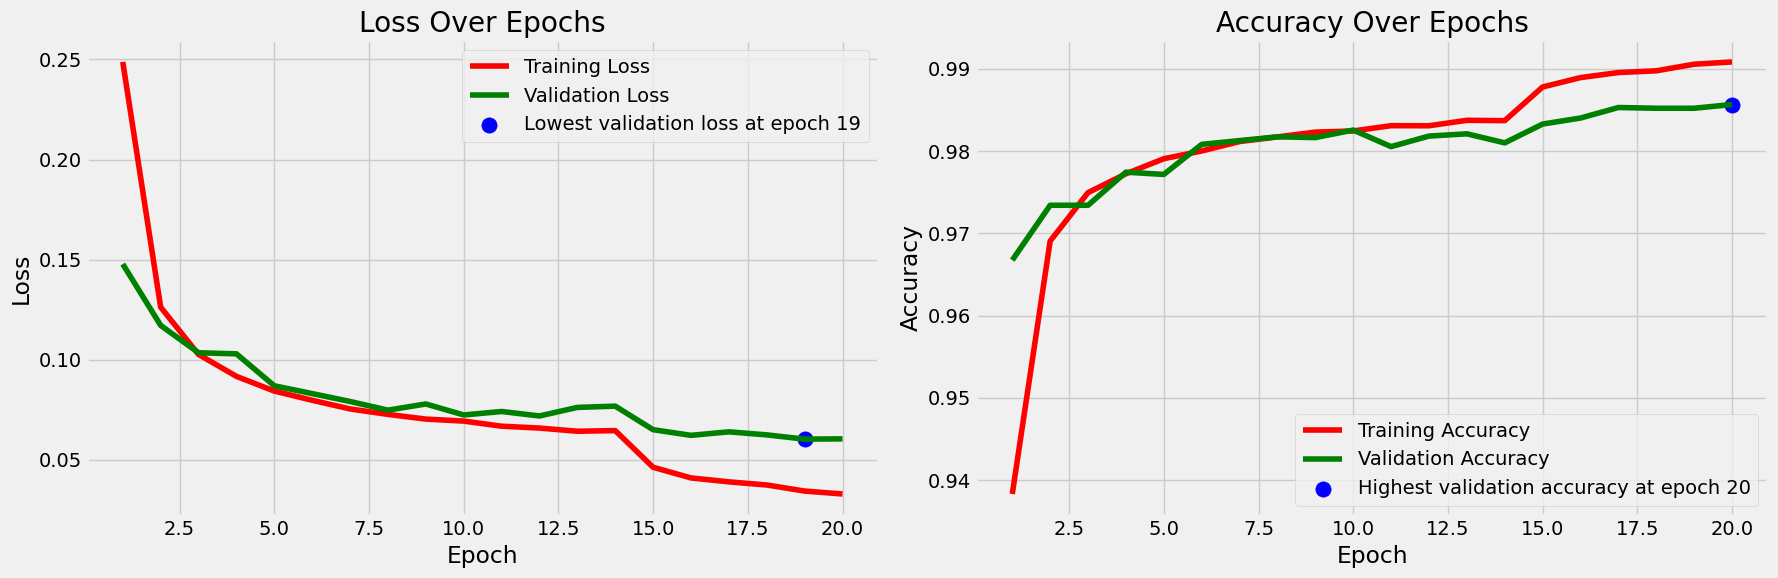

In [37]:
# Plot learning curves (function needs to be defined)
plot_learning_curves(hybrid_history, initial_epoch=0)

In [38]:
# Test the hybrid model
y_test_pred_hybrid = hybrid_model.predict(X_test_final).argmax(axis=1)
hybrid_test_loss, hybrid_test_acc = hybrid_model.evaluate(X_test_final, y_test_final, verbose=0)
print(f"Hybrid Model Test Loss: {hybrid_test_loss:.4f}")
print(f"Hybrid Model Test Accuracy: {hybrid_test_acc:.4f}")

343/343 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Hybrid Model Test Loss: 0.0595
Hybrid Model Test Accuracy: 0.9863


In [39]:
# Classification report
print("Hybrid Model Classification Report:")
print(classification_report(y_test_final, y_test_pred_hybrid))

Hybrid Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9059
         1.0       0.87      0.81      0.84       278
         2.0       0.97      0.96      0.96       724
         3.0       0.78      0.84      0.81        81
         4.0       1.00      0.99      0.99       804

    accuracy                           0.99     10946
   macro avg       0.92      0.92      0.92     10946
weighted avg       0.99      0.99      0.99     10946



(<Figure size 2000x1000 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

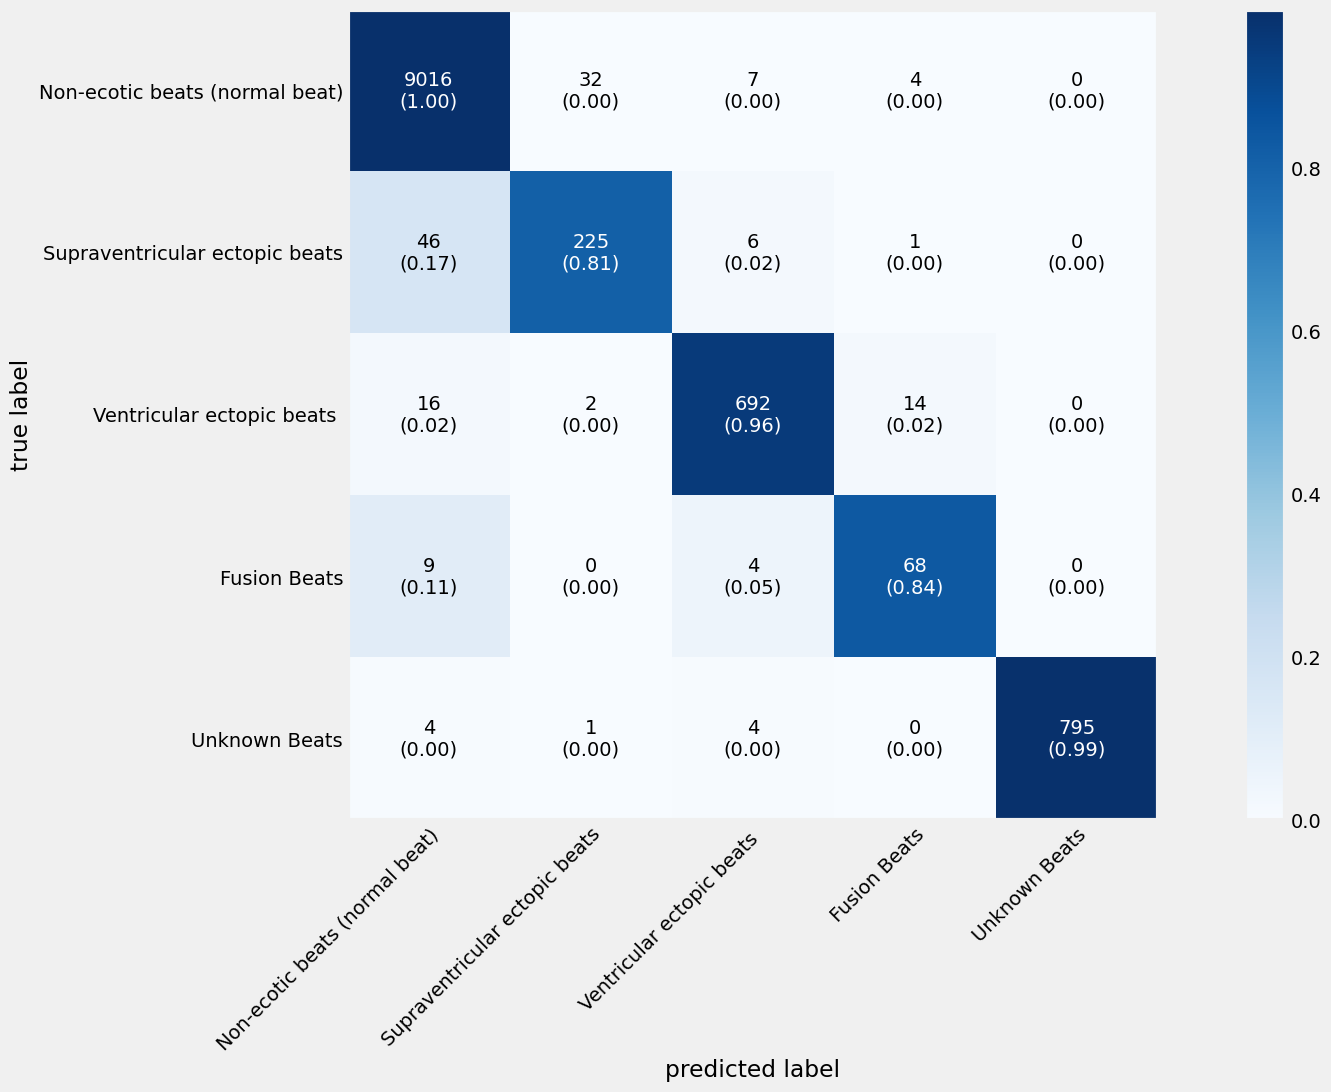

In [42]:
# Confusion matrix
conf_matrix_hybrid = confusion_matrix(y_test_final, y_test_pred_hybrid)
class_names = [labels[i] for i in range(len(labels))]

# Plot the confusion matrix (function needs to be defined)
plot_confusion_matrix(conf_matrix_hybrid, 
                      class_names=class_names, 
                      show_normed=True,
                      figsize=(20,10),
                      colorbar=True)


In [43]:
#Save the model
hybrid_model.save("hybrid_model_cnn_lstm_gru.h5")
print("Hybrid model saved as 'hybrid_model.h5'")

Hybrid model saved as 'hybrid_model.h5'


## Attempting aditional improvements for hybrid model architecture with data augmentation using Class Imbalance Handling

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, GRU, LSTM, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


In [12]:
# Load and preprocess data
features_train = train_data.iloc[:, :-1].values
labels_train = train_data.iloc[:, -1].values
features_test = test_data.iloc[:, :-1].values
labels_test = test_data.iloc[:, -1].values

# Scale the data
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Split test set into validation and final test sets
X_val, X_test_final, y_val, y_test_final = train_test_split(
    features_test_scaled, labels_test, test_size=0.5, random_state=42, stratify=labels_test
)

In [13]:
# Reshape data for RNN/LSTM/GRU compatibility
features_train_scaled = np.reshape(features_train_scaled, (features_train_scaled.shape[0], features_train_scaled.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_final = np.reshape(X_test_final, (X_test_final.shape[0], X_test_final.shape[1], 1))

# Class balancing using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
features_train_balanced, labels_train_balanced = smote.fit_resample(features_train_scaled.reshape(features_train_scaled.shape[0], -1), labels_train)
features_train_balanced = features_train_balanced.reshape(features_train_balanced.shape[0], features_train_scaled.shape[1], 1)


In [14]:
# Augmentation Functions
def time_shift(signal, max_shift=5):
    """Shift the signal by a random amount between -max_shift and +max_shift."""
    shift = np.random.randint(-max_shift, max_shift)
    return np.roll(signal, shift, axis=0)

def add_noise(signal, noise_factor=0.01):
    """Add random noise to the signal."""
    noise = np.random.normal(0, noise_factor, signal.shape)
    return signal + noise

def scale_signal(signal, scale_factor=1.2):
    """Scale the signal by a random factor."""
    scale = np.random.uniform(1, scale_factor)
    return signal * scale

def jitter_signal(signal, jitter_factor=0.05):
    """Jitter the signal by adding random offsets."""
    jitter = np.random.uniform(-jitter_factor, jitter_factor, signal.shape)
    return signal + jitter

def time_warp(signal, max_segments=4):
    """Time Warping function to apply random stretch and squeeze to the signal."""
    # Get random segments to warp
    segments = np.linspace(0, len(signal), max_segments + 1).astype(int)
    warped_signal = signal.copy()
    
    for i in range(1, len(segments)):
        start, end = segments[i-1], segments[i]
        segment = warped_signal[start:end]
        scale = np.random.uniform(0.8, 1.2)
        warped_signal[start:end] = np.interp(np.arange(start, end), np.arange(start, end), segment*scale)
    
    return warped_signal

# Apply augmentations
features_train_time_shifted = np.array([time_shift(feature) for feature in features_train_scaled])
features_train_noisy = np.array([add_noise(feature) for feature in features_train_scaled])
features_train_scaled_augmented = np.array([scale_signal(feature) for feature in features_train_scaled])
features_train_jittered = np.array([jitter_signal(feature) for feature in features_train_scaled])
features_train_time_warped = np.array([time_warp(feature.flatten()) for feature in features_train_scaled])

# Reshape augmented features to match input shape
features_train_time_shifted = features_train_time_shifted.reshape(features_train_time_shifted.shape[0], features_train_scaled.shape[1], 1)
features_train_noisy = features_train_noisy.reshape(features_train_noisy.shape[0], features_train_scaled.shape[1], 1)
features_train_scaled_augmented = features_train_scaled_augmented.reshape(features_train_scaled_augmented.shape[0], features_train_scaled.shape[1], 1)
features_train_jittered = features_train_jittered.reshape(features_train_jittered.shape[0], features_train_scaled.shape[1], 1)
features_train_time_warped = features_train_time_warped.reshape(features_train_time_warped.shape[0], features_train_scaled.shape[1], 1)

# Combine the original and augmented datasets
features_train_combined = np.concatenate(
    (features_train_scaled, features_train_time_shifted, features_train_noisy, 
     features_train_scaled_augmented, features_train_jittered, features_train_time_warped),
    axis=0
)

# Duplicate labels for augmented data
labels_train_combined = np.concatenate(
    (labels_train, labels_train, labels_train, labels_train, labels_train, labels_train),
    axis=0
)

# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(labels_train_combined), y=labels_train_combined)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=2, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('hybrid_model.keras', monitor='val_loss', save_best_only=True)
callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Hybrid Model Definition
def create_hybrid_model():
    model = Sequential()
    
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(features_train_scaled.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    # GRU layer (before Flatten)
    model.add(GRU(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # LSTM layer (before Flatten)
    model.add(LSTM(32))
    model.add(Dropout(0.3))
    
    # Flatten the output
    model.add(Flatten())
    
    # Dense layers with L2 regularization for the first Dense layer
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(5, activation='softmax'))
    
    return model

# Initialize and compile the hybrid model
hybrid_model = create_hybrid_model()
hybrid_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the hybrid model with augmented data and class weights
hybrid_history = hybrid_model.fit(
    features_train_combined, labels_train_combined,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    class_weight=class_weights_dict
)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
16417/16417 ━━━━━━━━━━━━━━━━━━━━ 570s 35ms/step - accuracy: 0.4074 - loss: 1.0766 - val_accuracy: 0.8362 - val_loss: 0.5736 - learning_rate: 0.0010
Epoch 2/20
16417/16417 ━━━━━━━━━━━━━━━━━━━━ 560s 34ms/step - accuracy: 0.8132 - loss: 0.4652 - val_accuracy: 0.8587 - val_loss: 0.4661 - learning_rate: 0.0010
Epoch 3/20
16417/16417 ━━━━━━━━━━━━━━━━━━━━ 554s 34ms/step - accuracy: 0.8438 - loss: 0.3856 - val_accuracy: 0.8802 - val_loss: 0.4120 - learning_rate: 0.0010
Epoch 4/20
16417/16417 ━━━━━━━━━━━━━━━━━━━━ 579s 35ms/step - accuracy: 0.8578 - loss: 0.3486 - val_accuracy: 0.8258 - val_loss: 0.4987 - learning_rate: 0.0010
Epoch 5/20
16417/16417 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8642 - loss: 0.3140
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
16417/16417 ━━━━━━━━━━━━━━━━━━━━ 578s 35ms/step - accuracy: 0.8642 - loss: 0.3140 - val_accuracy: 0.8385 - val_loss: 0.4942 - learning_rate: 0.0010
Epoch 6/20
16417/16417 ━━━━━━━━━━━━━━━━━━━━ 555s

In [15]:
# Evaluate the hybrid model
y_test_pred_hybrid = hybrid_model.predict(X_test_final).argmax(axis=1)
hybrid_test_loss, hybrid_test_acc = hybrid_model.evaluate(X_test_final, y_test_final, verbose=0)
print(f"Hybrid Model Test Loss: {hybrid_test_loss:.4f}")
print(f"Hybrid Model Test Accuracy: {hybrid_test_acc:.4f}")


343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Hybrid Model Test Loss: 0.2169
Hybrid Model Test Accuracy: 0.9277


In [16]:
# Classification report
print("Hybrid Model Classification Report:")
print(classification_report(y_test_final, y_test_pred_hybrid))


Hybrid Model Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      9059
         1.0       0.34      0.88      0.49       278
         2.0       0.89      0.94      0.91       724
         3.0       0.32      0.94      0.47        81
         4.0       0.97      0.99      0.98       804

    accuracy                           0.93     10946
   macro avg       0.70      0.94      0.76     10946
weighted avg       0.96      0.93      0.94     10946



(<Figure size 2000x1000 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

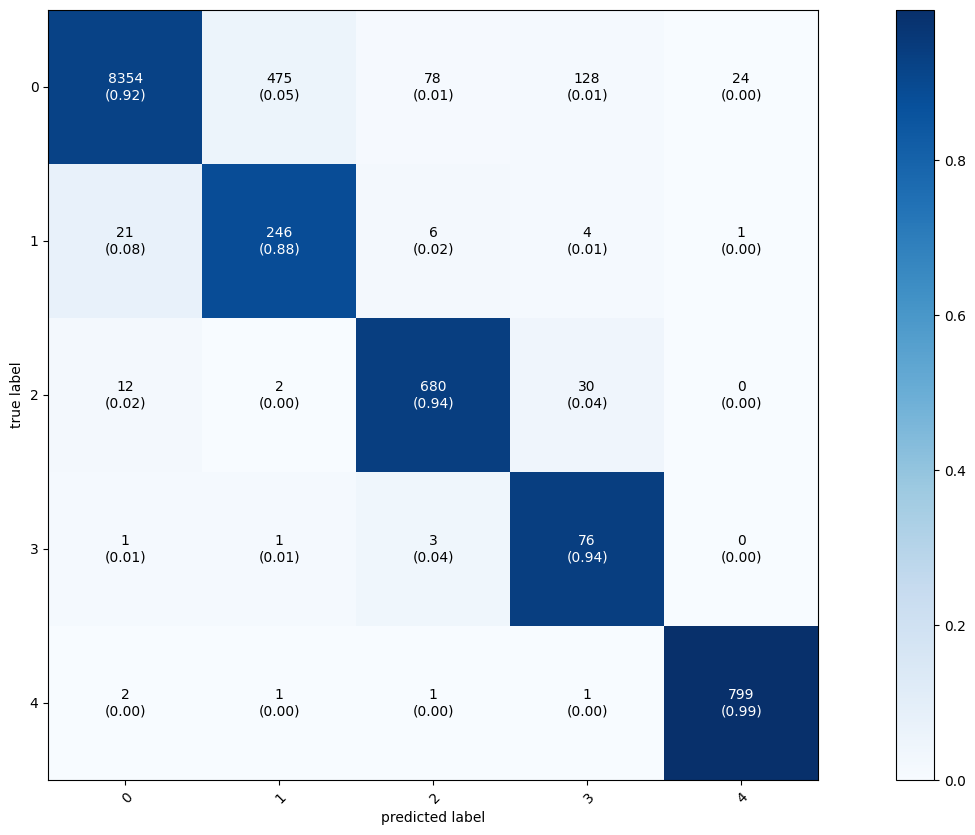

In [17]:
# Confusion matrix
conf_matrix_hybrid = confusion_matrix(y_test_final, y_test_pred_hybrid)
class_names = [str(i) for i in range(len(np.unique(labels_train_combined)))]  

plot_confusion_matrix(conf_matrix_hybrid, 
                      class_names=class_names, 
                      show_normed=True,
                      figsize=(20,10),
                      colorbar=True)

In [28]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import numpy as np

# Define augmentation functions
def time_shift(signal, max_shift=5):
    shift = np.random.randint(-max_shift, max_shift)
    return np.roll(signal, shift, axis=0)

def add_noise(signal, noise_factor=0.01):
    noise = np.random.normal(0, noise_factor, signal.shape)
    return signal + noise

def scale_signal(signal, scale_factor=1.2):
    scale = np.random.uniform(1, scale_factor)
    return signal * scale

def jitter_signal(signal, jitter_factor=0.05):
    jitter = np.random.uniform(-jitter_factor, jitter_factor, signal.shape)
    return signal + jitter

def time_warp(signal, max_time_warp=5):
    warp = np.random.uniform(-max_time_warp, max_time_warp, size=signal.shape)
    return signal + warp

# Apply augmentation only to classes 1 and 3
features_train_class1_augmented = add_noise(features_train_scaled[labels_train == 1])
features_train_class3_augmented = add_noise(features_train_scaled[labels_train == 3])
features_train_class1_augmented = np.concatenate([
    features_train_class1_augmented,
    time_shift(features_train_scaled[labels_train == 1]),
    scale_signal(features_train_scaled[labels_train == 1]),
    jitter_signal(features_train_scaled[labels_train == 1]),
    time_warp(features_train_scaled[labels_train == 1])
])

features_train_class3_augmented = np.concatenate([
    features_train_class3_augmented,
    time_shift(features_train_scaled[labels_train == 3]),
    scale_signal(features_train_scaled[labels_train == 3]),
    jitter_signal(features_train_scaled[labels_train == 3]),
    time_warp(features_train_scaled[labels_train == 3])
])

# Combine original and augmented data
features_train_combined = np.concatenate([features_train_scaled, features_train_class1_augmented, features_train_class3_augmented], axis=0)
labels_train_combined = np.concatenate([labels_train, np.full(len(features_train_class1_augmented), 1), np.full(len(features_train_class3_augmented), 3)], axis=0)

# Compute class weights and adjust for classes 1 and 3
initial_class_weights = compute_class_weight('balanced', classes=np.unique(labels_train_combined), y=labels_train_combined)
class_weights = dict(enumerate(initial_class_weights))
class_weights[1] *= 2
class_weights[3] *= 2
print("Adjusted class weights:", class_weights)

# Compile and fit the hybrid model with updated class weights
hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = hybrid_model.fit(
    features_train_combined, labels_train_combined,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weights
)

# Evaluate the model on the test set
test_loss, test_accuracy = hybrid_model.evaluate(X_test_final, y_test_final)
print(f"Test accuracy after reweighting: {test_accuracy:.4f}")

# Generate predictions for evaluation
y_pred_probs = hybrid_model.predict(X_test_final)
y_pred = np.argmax(y_pred_probs, axis=1)



Adjusted class weights: {0: 0.28114530150407063, 1: 3.0551207077522866, 2: 3.5201451278507254, 3: 10.595215808632345, 4: 3.16818535220028}
Epoch 1/20
3184/3184 ━━━━━━━━━━━━━━━━━━━━ 109s 34ms/step - accuracy: 0.9080 - loss: 0.2865 - val_accuracy: 0.8839 - val_loss: 0.3045 - learning_rate: 0.0010
Epoch 2/20
3184/3184 ━━━━━━━━━━━━━━━━━━━━ 109s 34ms/step - accuracy: 0.9065 - loss: 0.2814 - val_accuracy: 0.9374 - val_loss: 0.1835 - learning_rate: 0.0010
Epoch 3/20
3184/3184 ━━━━━━━━━━━━━━━━━━━━ 109s 34ms/step - accuracy: 0.9045 - loss: 0.3012 - val_accuracy: 0.9321 - val_loss: 0.2162 - learning_rate: 0.0010
Epoch 4/20
3183/3184 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9084 - loss: 0.2947
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
3184/3184 ━━━━━━━━━━━━━━━━━━━━ 109s 34ms/step - accuracy: 0.9084 - loss: 0.2947 - val_accuracy: 0.9215 - val_loss: 0.2323 - learning_rate: 0.0010
Epoch 5/20
3184/3184 ━━━━━━━━━━━━━━━━━━━━ 109s 34ms/step - accuracy: 0.9251 - 

In [29]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test_final, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      9059
         1.0       0.24      0.91      0.38       278
         2.0       0.91      0.94      0.92       724
         3.0       0.18      0.95      0.30        81
         4.0       0.97      0.99      0.98       804

    accuracy                           0.88     10946
   macro avg       0.66      0.93      0.70     10946
weighted avg       0.96      0.88      0.91     10946

